In [22]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007


### for column names, refer the attribute information in magic04.names

In [23]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magicData/magic04.data", names=cols) # to label the column
df.head() # to show first 5 lines

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [24]:
# df["class"].unique()

g = gamma
h = hadron
computer does not understand letter. It understands numbers.

In [25]:
df["class"] = (df["class"] == "g").astype(int)

## Our target is to 
## Predict what will be the class of future datas among g, h whereas g stands for gamma and h stands for hadron
### this is known as classification.

here the column labels are features. These are pass on to our model to predict our 'class' label.
### This is supervised learning as we know the label as 'g'.


In [26]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


### These are the data will be used for training.

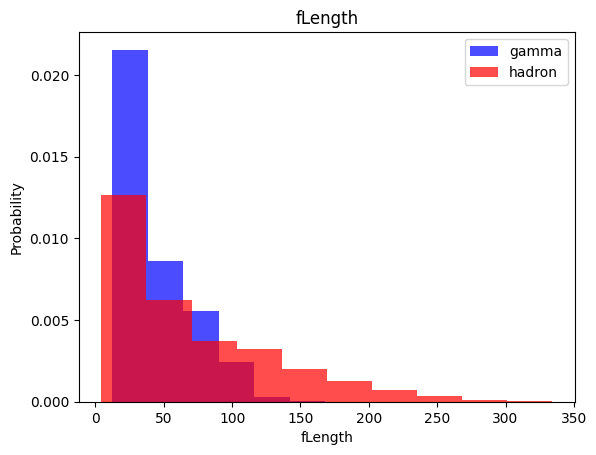

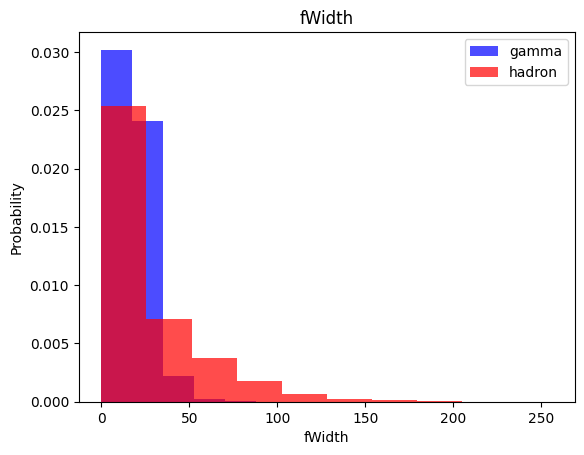

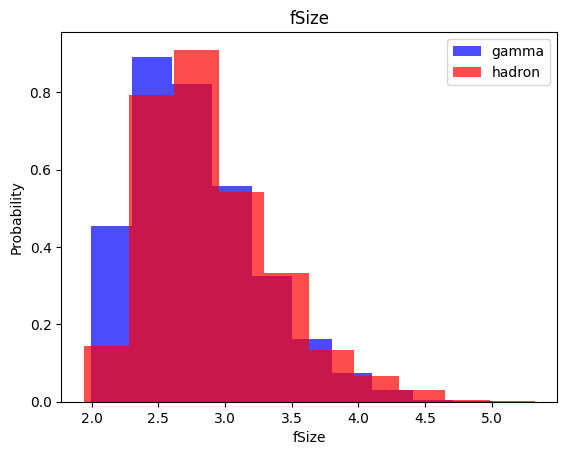

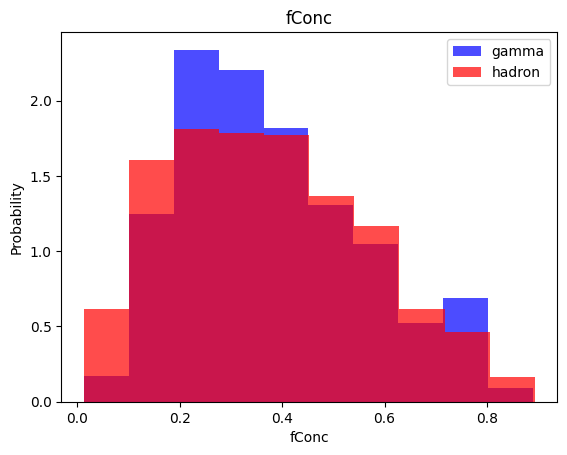

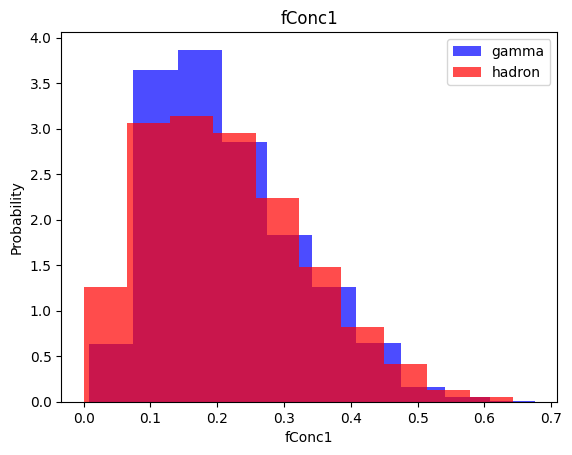

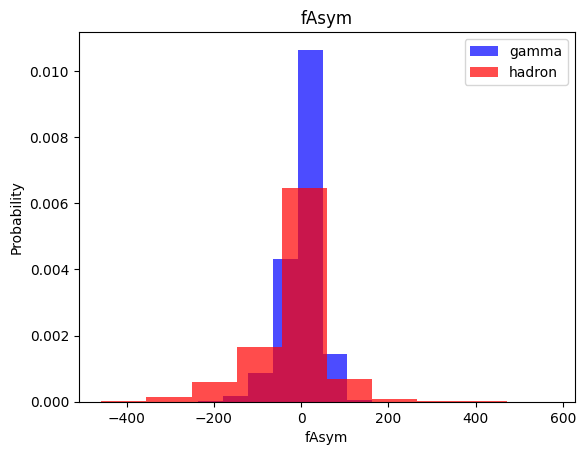

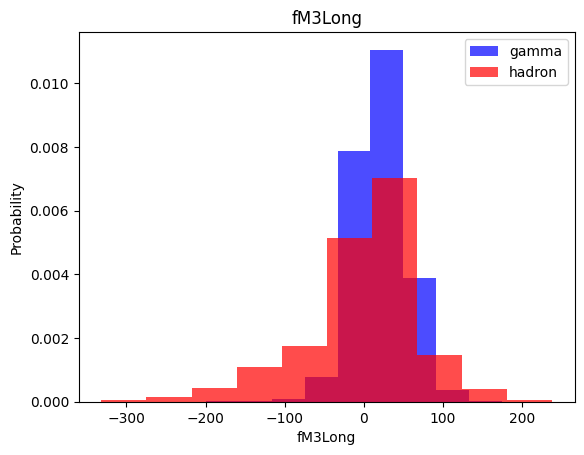

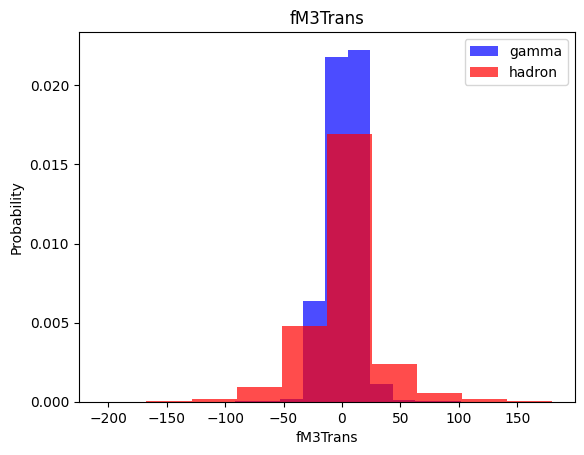

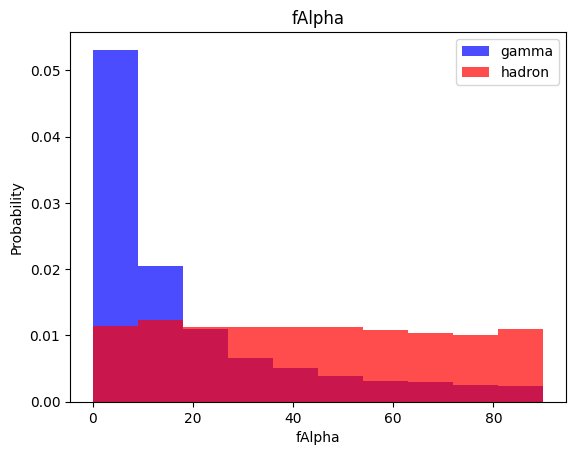

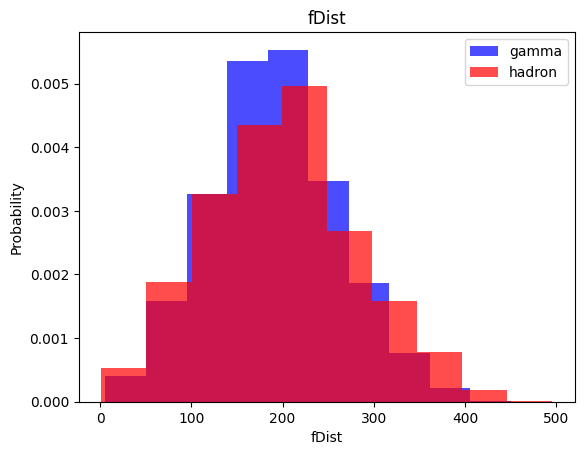

In [27]:
for label in cols[:-1]:   # -1 for except class column
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True) 
    # get here everything wehre the class == 1
    # alpha means the transparency.
    # density normalizes the data.
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

##  Train, validation, test datasets

In [28]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

### The datas are not scaled as some are in hundred, and some are in 0.3... something. 

In [29]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(x)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y

In [30]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [31]:
len(y_train)

14780

In [32]:
sum(y_train == 1)

7390

In [33]:
sum(y_train == 0)

7390

Now, they are evenly balance, both gamma and hadron.

Now, our data properly formatted.

# First Model KNN k-Nearest Neighbors (Supervised Learning)
Let's define distance and classify some points
For 2D points the distance used is Euclidean distace.
Euclidean distace = 
$$d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$$
here, in knn, k represents the number of label used as neighbor may be 3 or 5 ...

we will take k = 3 
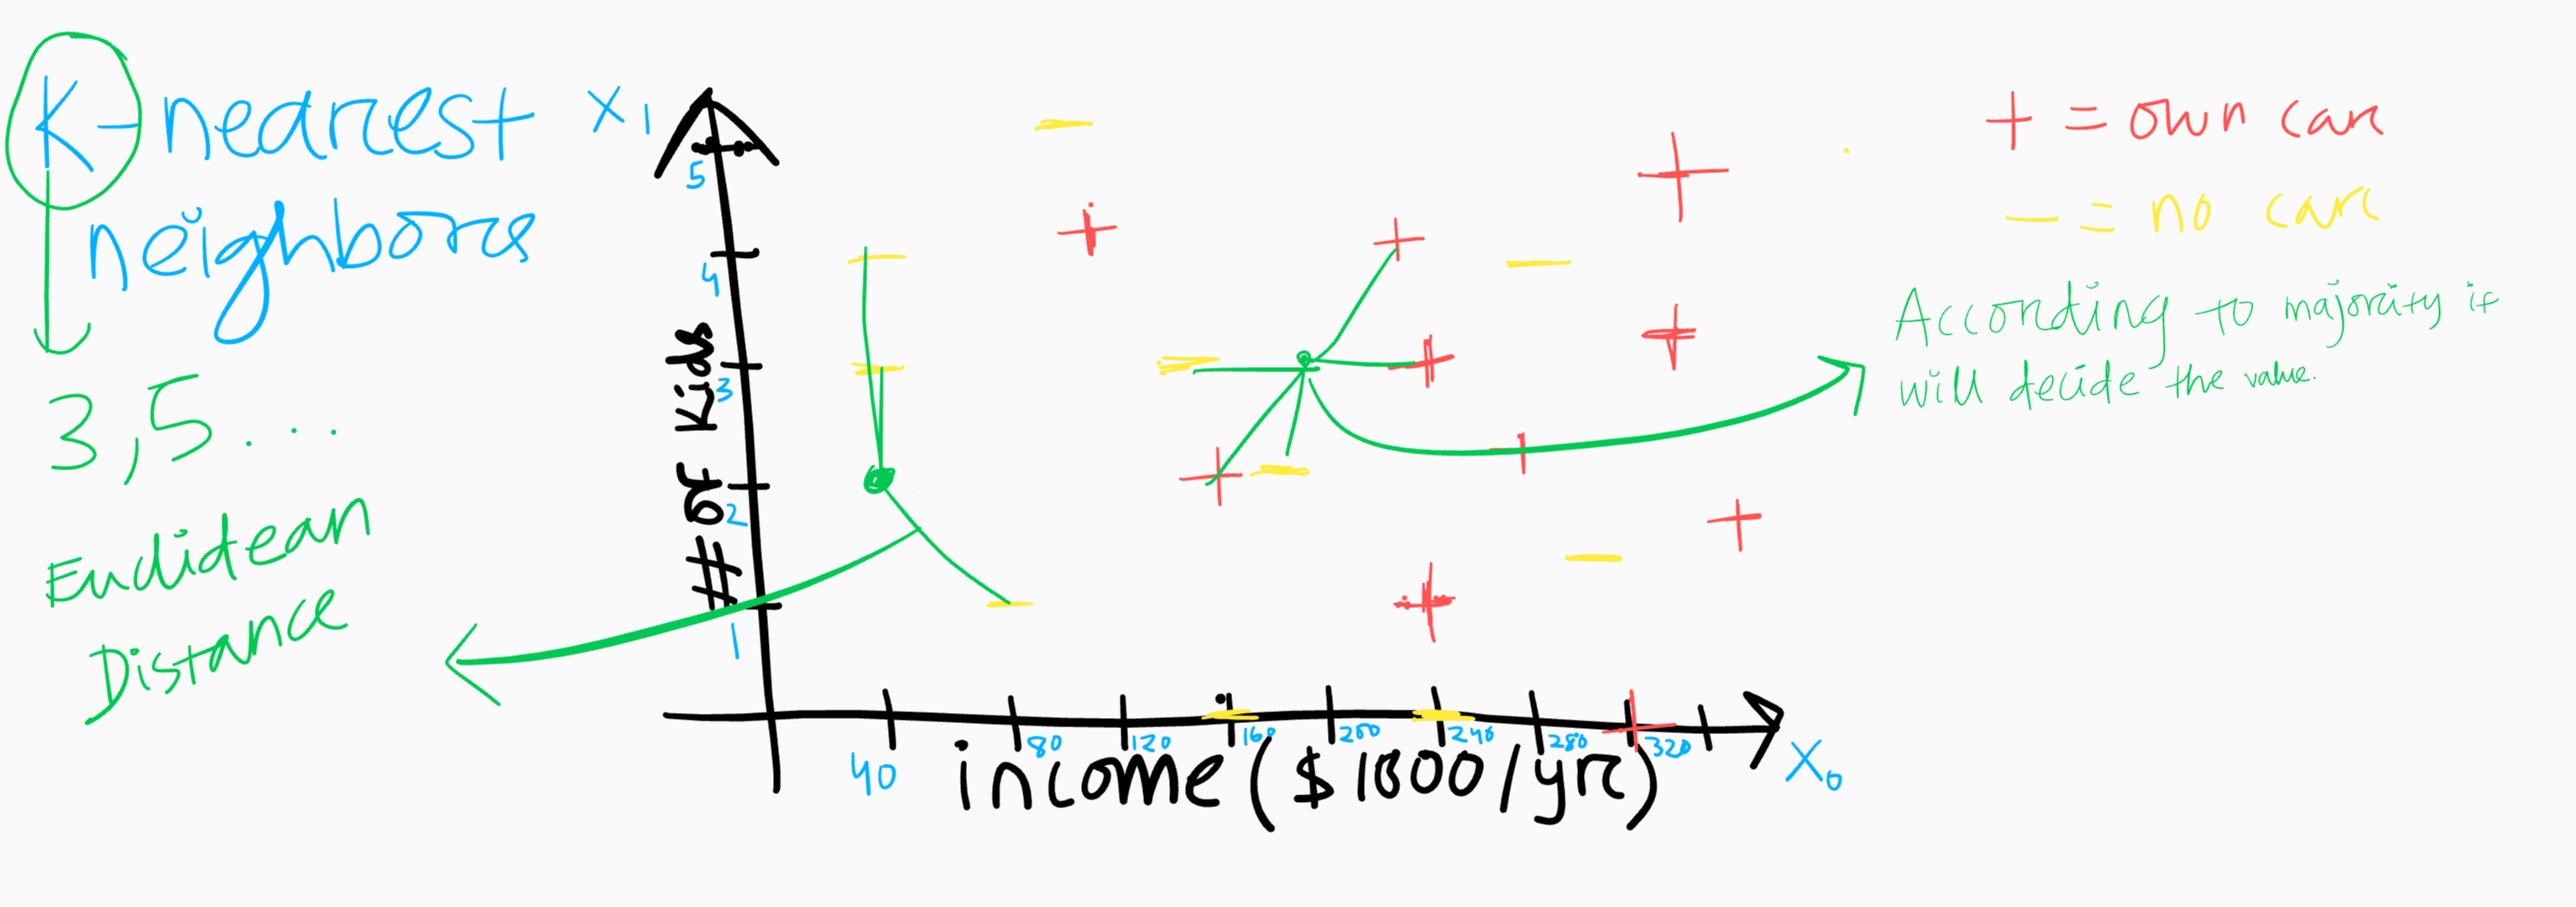

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
y_pred = knn_model.predict(X_test)

In [37]:
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [38]:
y_test

array([1, 0, 0, ..., 0, 1, 0])

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1338
           1       0.86      0.86      0.86      2466

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes Model
$$P(A|B) = \frac{P(B|A).P(A)}{P(B)}$$
This is the Bayes' Rule for probability.
$P(A|B)$ => Posterior
$\frac{P(B|A)$ => Likelihood
$P(A)$ => Prior
$P(B)$ => Evidence

So, in our use cases, the formula will be 
$$P(A|x_1, x_2,..., x_n) = \frac{P(x_1, x_2,..., x_n|A).P(A)}{P(x_1, x_2,..., x_n)}$$
$\hat{y}(predicted y)$
$$\hat{y} = \arg \max_{k \in \{ 1, k\}} P(C_k)\prod_{i=1}^{n}P(x_i|C_k)$$
MAP = Maximum A Posteriori

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [42]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.39      0.50      1338
           1       0.73      0.90      0.81      2466

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.72      0.72      0.70      3804



# Logistic Regression
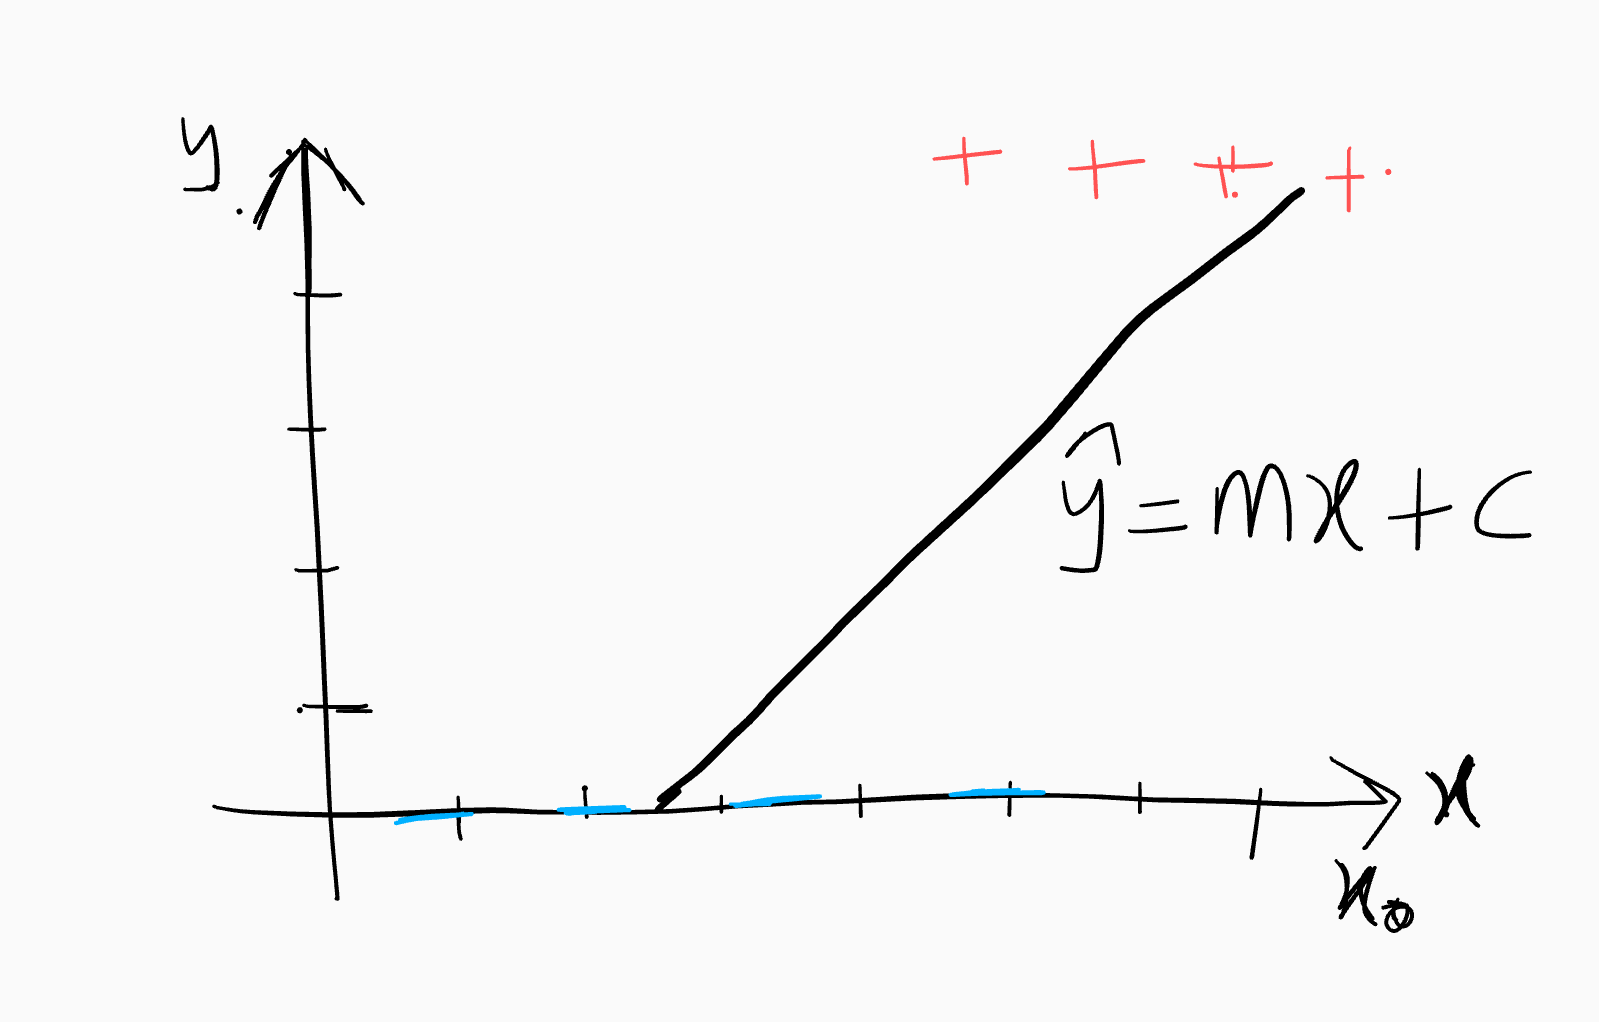

## How can we model probability ?
$$\hat{y} = mx + c$$
$$p = mx + c$$
$$\frac{p}{1-p} = mx + c$$
$$ln(\frac{p}{1-p}) = mx + c$$
$$e^{ln(\frac{p}{1-p})} = e^{mx + c}$$
$$\frac{p}{1-p} = e^{mx + c}$$
$$p = (1-p)e^{mx + c}$$
$$p = e^{mx + c} - pe^{mx + c}$$
$$p(1+e^{mx + c}) = e^{mx + c}$$
$$p = \frac{e^{mx + c}}{1 + e^{mx + c}}$$
$$p = \frac{e^{mx + c}}{1 + e^{mx + c}} . \frac{e^{-(mx + c)}}{e^{-(mx + c)}}$$
$$p = \frac{1}{1+e^{-(mx + c)}}$$

Sigmoid Function :

$$S(y) = \frac{1}{1+e^{-y}}$$
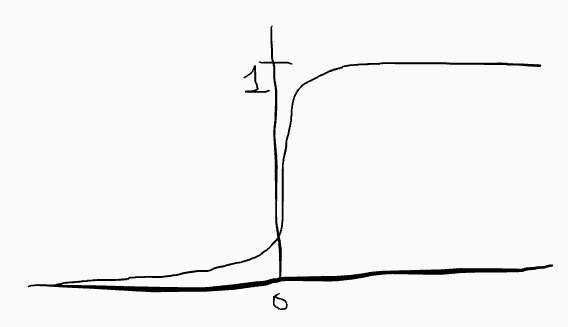
If we have one feature -> simple logistic regression
multiple feature -> multiple logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [45]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1338
           1       0.85      0.83      0.84      2466

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



## Support Vector Machines (SVM)
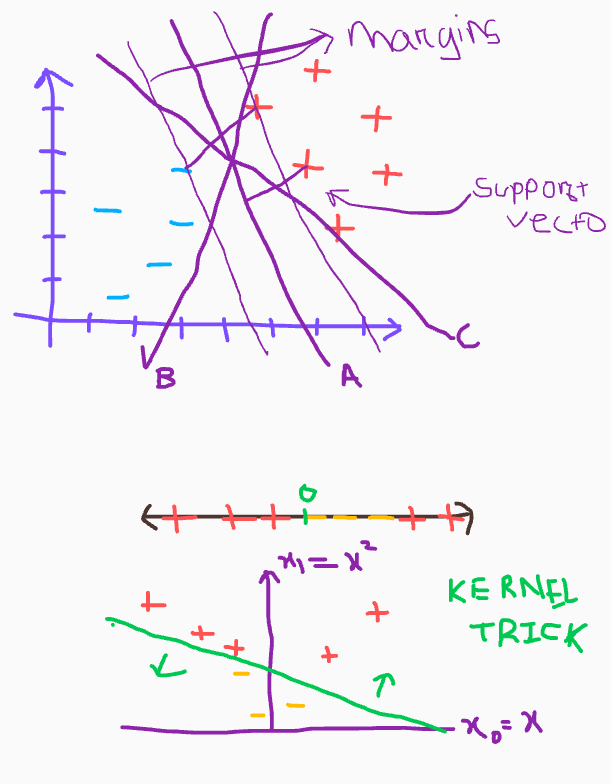

In [49]:
from sklearn.svm import SVC

In [51]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [53]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1338
           1       0.89      0.90      0.90      2466

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804

